<a href="https://colab.research.google.com/github/maxashoka3/Rossmann-Sales-Prediction/blob/main/Rossmann_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing Packages

In [ ]:
#Import Packages
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")

#Ignore warnings
import warnings
warnings.filterwarnings("ignore")

### **2.Data Preprocessing**
    2.1 Load Dataset

In [ ]:
#importing the both data
rossmann_df = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Machine Learning Project/Rossmann Retail Sales Prediction/Rossmann Stores Data.csv',
                
                          parse_dates = True, index_col = 'Date')
store = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Machine Learning Project/Rossmann Retail Sales Prediction/store.csv')


In [ ]:
# No of rows and columns in rossmann dataset
print("# of observations & # of features", rossmann_df.shape)
rossmann_df.head()

# of observations & # of features (1017209, 8)


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1
2015-07-31,2,5,6064,625,1,1,0,1
2015-07-31,3,5,8314,821,1,1,0,1
2015-07-31,4,5,13995,1498,1,1,0,1
2015-07-31,5,5,4822,559,1,1,0,1


In [ ]:
# Getting the Rossmann dataset information
rossmann_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1017209 entries, 2015-07-31 to 2013-01-01
Data columns (total 8 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Sales          1017209 non-null  int64 
 3   Customers      1017209 non-null  int64 
 4   Open           1017209 non-null  int64 
 5   Promo          1017209 non-null  int64 
 6   StateHoliday   1017209 non-null  object
 7   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 69.8+ MB


In [ ]:
# Getting the Description of Rossmann Dataset
rossmann_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [ ]:
print("# of observations & # of features", store.shape)
store.head()

# of observations & # of features (1115, 10)


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


2.2 Dealing with Missing Values

2.2.1 Count missing values in each dataset

In [ ]:
print(f"rossmann dataset : \n{rossmann_df.isnull().sum()}")
print(f"\n\n Store: \n{store.isnull().sum()}")

rossmann dataset : 
Store            0
DayOfWeek        0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64


 Store: 
Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64


**2.2.2 Remove features with high percentages of missing values**

we can see that some features have a high percentage of missing values and they won't be accurate as indicators, so we will remove features with more than 30% missing values.

In [ ]:
# removing features
store = store.drop(['CompetitionOpenSinceMonth', 
                    'CompetitionOpenSinceYear','Promo2SinceWeek',
                     'Promo2SinceYear', 'PromoInterval'], axis=1)

Text(0.5, 1.0, 'Distribution of Store Competition Distance')

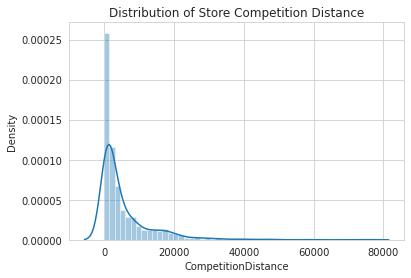

In [ ]:
# CompetitionDistance is distance in meters to the nearest competitor
sns.distplot(store.CompetitionDistance.dropna())
plt.title("Distribution of Store Competition Distance")

**The distribution is right skewed, so we'll replace missing values with the median.**

In [ ]:
# replace missing values in Competition Distance with median for the store dataset
store.CompetitionDistance.fillna(store.CompetitionDistance.median(),inplace = True)

**2.3 Data Extraction**

In [ ]:
rossmann_df.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [ ]:
# extract year, month, day and week of year from 'Date
rossmann_df['Year'] = rossmann_df.index.year
rossmann_df['Month'] = rossmann_df.index.month
rossmann_df['Day'] = rossmann_df.index.day
rossmann_df['WeekOfYear'] = rossmann_df.index.weekofyear
rossmann_df = rossmann_df.reset_index()

**2.4  Joining Tables**

In [ ]:
# Joining the rossman dataset and store dataset
df = pd.merge(rossmann_df,store,how = 'left',on = 'Store')
df.head().T

,0,1,2,3,4
Date,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00
Store,1,2,3,4,5
DayOfWeek,5,5,5,5,5
Sales,5263,6064,8314,13995,4822
Customers,555,625,821,1498,559
Open,1,1,1,1,1
Promo,1,1,1,1,1
StateHoliday,0,0,0,0,0
SchoolHoliday,1,1,1,1,1
Year,2015,2015,2015,2015,2015


In [ ]:
print(f'The length of new dataframe is : {len(df)}')

The length of new dataframe is : 1017209


**2.5 Drop Subsets of Data where might Cause Bias**

In [ ]:
# Checking the unique value of 'Open' features
df['Open'].unique()

array([1, 0])

Here open has two variables 
* 0 ---- Store has Closed
* 1 ---- Store has Oened

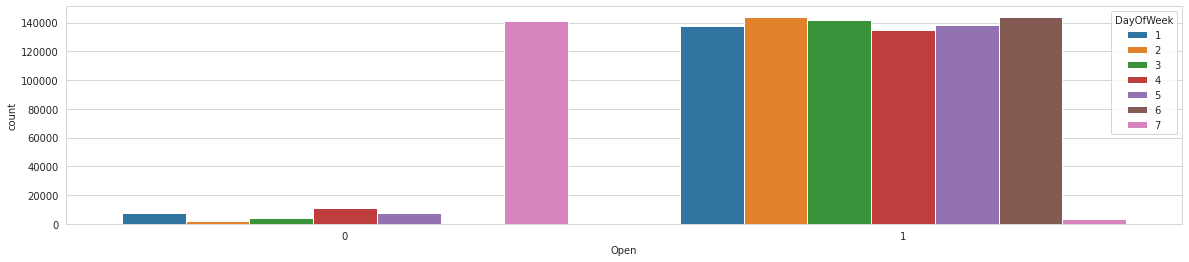

In [ ]:
fig, ax = plt.subplots(1,figsize=(20,4))
sns.countplot(x='Open',hue='DayOfWeek', data=df, ax=ax)

The above graph creates a question how **stores are selling when they are closed**.
So we will delete the rows which are closed..

In [ ]:
# Selecting the store which are opened
df = df[df['Open'] == 1]

In [ ]:
# Now we can delete the features Open as it will create bias
df = df.drop('Open',axis = 1)


Total Number of store with zero sales : 54



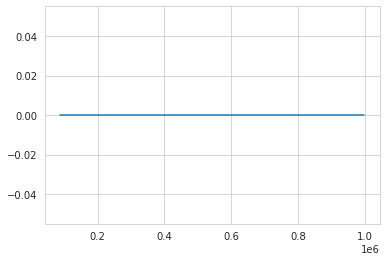

In [ ]:
#  Checking the store with zero sales
zero_sales = df[df.Sales == 0]
print(f'Total Number of store with zero sales : {len(zero_sales)}\n')
zero_sales['Sales'].plot()

In [ ]:
df.Sales.describe()

count    844392.000000
mean       6955.514291
std        3104.214680
min           0.000000
25%        4859.000000
50%        6369.000000
75%        8360.000000
max       41551.000000
Name: Sales, dtype: float64

In [ ]:
#removing the data with zero sales|
df.drop(df[ (df.Sales < 1)].index,inplace=True)

In [ ]:
print(f'The length of new dataframe is : {len(df)}')

The length of new dataframe is : 844338


**2.6 Feature Engineering**

In [ ]:
# Getting the information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844338 entries, 0 to 1017190
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Date                 844338 non-null  datetime64[ns]
 1   Store                844338 non-null  int64         
 2   DayOfWeek            844338 non-null  int64         
 3   Sales                844338 non-null  int64         
 4   Customers            844338 non-null  int64         
 5   Promo                844338 non-null  int64         
 6   StateHoliday         844338 non-null  object        
 7   SchoolHoliday        844338 non-null  int64         
 8   Year                 844338 non-null  int64         
 9   Month                844338 non-null  int64         
 10  Day                  844338 non-null  int64         
 11  WeekOfYear           844338 non-null  int64         
 12  StoreType            844338 non-null  object        
 13  Assortment   

**2.6.1 Categorical Data**

We should not encoding we are using the random forest or the esemble learning algorithm. But we will be using other algotrithm also

2.6.1.1   Nominal Variables



In [ ]:
#Categorical data 
li = li = df.select_dtypes(include=["object_"])

for i in li:
  print(i)
  print(df[i].unique())
  print("-----------------------")

StateHoliday
['0' 'a' 'b' 'c' 0]
-----------------------
StoreType
['c' 'a' 'd' 'b']
-----------------------
Assortment
['a' 'c' 'b']
-----------------------


We can see there are two **0** with numerical and integer types.So we need to convert it to string.

In [ ]:
df.dropna(inplace = True)

In [ ]:
#converting to string type
df.loc[df.StateHoliday == 0,'StateHoliday'] = df.loc[df.StateHoliday == 0,'StateHoliday'].astype(str)

In [ ]:
#Check again
set(df.StateHoliday)

{'0', 'a', 'b', 'c'}

In [ ]:
df = pd.get_dummies(df,drop_first = True)

In [ ]:
df.head()

,Date,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday,Year,Month,Day,WeekOfYear,CompetitionDistance,Promo2,StateHoliday_a,StateHoliday_b,StateHoliday_c,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c
0,2015-07-31,1,5,5263,555,1,1,2015,7,31,31,1270.0,0,0,0,0,0,1,0,0,0
1,2015-07-31,2,5,6064,625,1,1,2015,7,31,31,570.0,1,0,0,0,0,0,0,0,0
2,2015-07-31,3,5,8314,821,1,1,2015,7,31,31,14130.0,1,0,0,0,0,0,0,0,0
3,2015-07-31,4,5,13995,1498,1,1,2015,7,31,31,620.0,0,0,0,0,0,1,0,0,1
4,2015-07-31,5,5,4822,559,1,1,2015,7,31,31,29910.0,0,0,0,0,0,0,0,0,0


### **3.Exploratory Data Analysis**

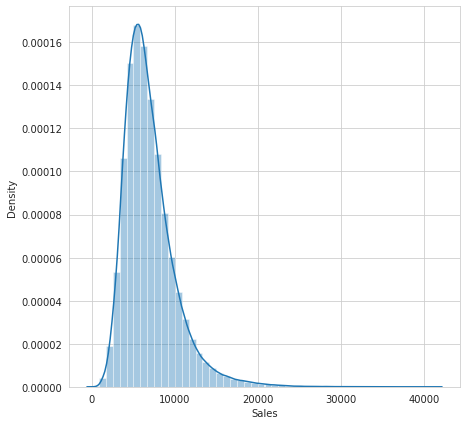

In [ ]:
plt.figure(figsize=(7,7))
sns.distplot(df['Sales'])

Data is slightly right skewed

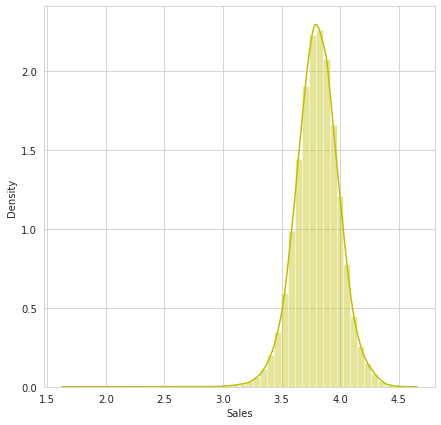

In [ ]:
# Dependent variable 'Price'
plt.figure(figsize=(7,7))
sns.distplot(np.log10(df['Sales']),color="y")

Even after taking log it really doesnt makes any changes.

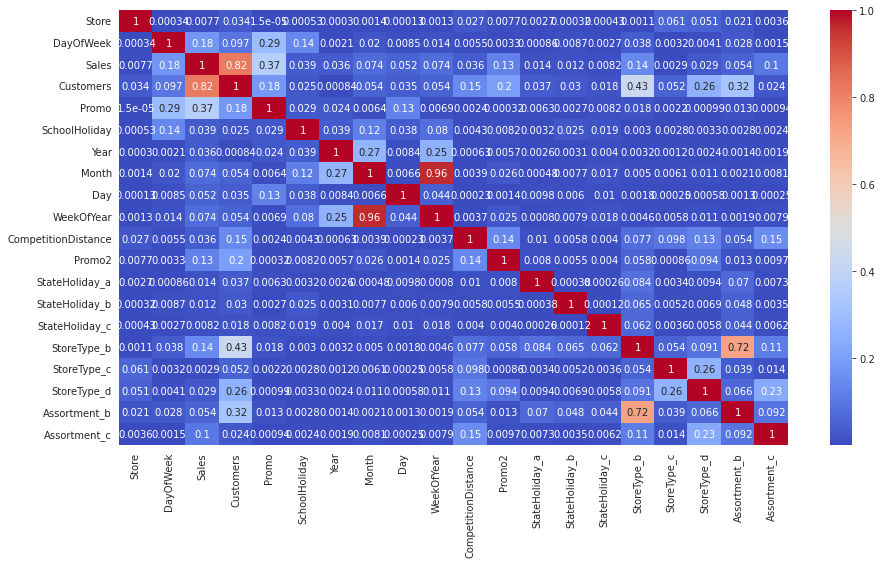

In [ ]:
 ## Correlation
plt.figure(figsize=(15,8))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

Some of the features have Multi-colinearity with each other.So we need to remove it.But it is not necessary for the CART or esemble learning i.e xgboost,random forest

In [ ]:
df_m = df.copy()

In [ ]:
df.drop(['StoreType_b','WeekOfYear'],inplace = True,axis = 1)

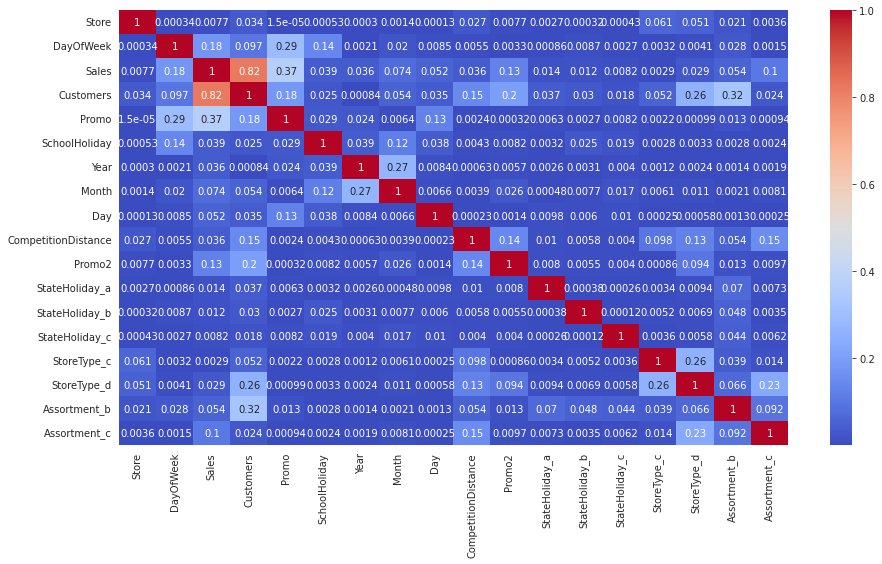

In [ ]:
 ## Correlation
plt.figure(figsize=(15,8))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

3.12 Pair Plot

### 4. Sales Prediction Through Different Machine learning

In [ ]:
df1 = df.drop(['Date','Store'], axis = 1)

In [ ]:
# Taking the sample of 50000
sample_df = df1.sample(n=50000, random_state=1)

In [ ]:
# Dividing the dataset into dependent variables and independent variablesY
y = sample_df['Sales']
X = sample_df.drop(['Sales'],axis = 1)

In [ ]:
y

418874     4116
355293     2277
874715     8336
379691    10274
111794     4294
          ...  
256374     8458
446862     8178
927314     4023
80889      4653
452149     7987
Name: Sales, Length: 50000, dtype: int64

In [ ]:
#pip install scikit-optimize

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
#from skopt import BayesSearchCV
#from skopt.space import Real,Categorical,Integer
from sklearn import ensemble
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from math import sqrt
from sklearn.metrics import mean_absolute_percentage_error as mape


In [ ]:
X.head()

,DayOfWeek,Customers,Promo,SchoolHoliday,Year,Month,Day,CompetitionDistance,Promo2,StateHoliday_a,StateHoliday_b,StateHoliday_c,StoreType_c,StoreType_d,Assortment_b,Assortment_c
418874,6,369,0,0,2014,6,21,250.0,1,0,0,0,0,1,0,1
355293,2,224,0,1,2014,8,26,970.0,1,0,0,0,0,1,0,0
874715,3,828,0,0,2013,5,8,450.0,0,0,0,0,0,0,0,0
379691,4,888,1,1,2014,7,31,14160.0,0,0,0,0,0,1,0,1
111794,3,674,0,0,2015,4,22,210.0,1,0,0,0,0,0,0,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X,y,
                                                    test_size = 0.2,
                                                    random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(40000, 16)
(10000, 16)


In [ ]:
# Transforming data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Now Lets implement 3 models on our dataset**


1.   Linear Regression
    
  

2.   **Random Forest**
3.   **XGBoost**
**We will be using threee search algorithms for each:**

**1. GridSearchCV**

**2. RandomSearchCV**

**3.BayesianSearchCV**


#### Implementing the machine learning without the hypertunning and cross-Fold

For the practise only

In [ ]:
#Fitting Linear regression to the training set
reg = LinearRegression
reg.fit(X_train,y_train)

TypeError: ignored

In [ ]:
def Performance_Metrices(y_train, y_test, y_pred_train,y_pred_test, model):
    def rmse(x, y):
        return sqrt(mse(x, y)) 


    print(f"Training R2 Score: {r2_score(y_train,y_pred_train)}")
    print("Testing R2 Score",".",r2_score(y_test,y_pred_test))

    print(f"Training Root Mean Square Error: {rmse(y_train,y_pred_train)}")
    print("Testing Root Mean Square Error",".",rmse(y_test,y_pred_test))

    print(f"Training MSE : {mse(y_train,y_pred_train)}")
    print(f"Testing MSE: {mse(y_test,y_pred_test)}")
    print(f"Training MAPE {mape(y_train, y_pred_train)}")
    print(f"Testing MAPE : {mape(y_test, y_pred_test)}")

In [ ]:
y_pred_train = reg.predict(X_train)
y_pred_test = reg.predict(X_test)
Performance_Metrices(y_train, y_test,y_pred_train,y_pred_test,reg)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rdf = RandomForestRegressor()
rdf.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
y_pred_train = rdf.predict(X_train)
y_pred_test = rdf.predict(X_test)
Performance_Metrices(y_train, y_test,y_pred_train,y_pred_test,reg)

Training R2 Score: 0.9872350217658684
Testing R2 Score . 0.906975029345172
Training Root Mean Square Error: 351.0447853282292
Testing Root Mean Square Error . 921.4954761166492
Training MSE : 123232.4413061425
Testing MSE: 849153.9125034501
Training MAPE 0.0371255029744118
Testing MAPE : 0.09827849193217314


#### Hyperparameter Tuning

In [ ]:
rdf.base_estimator_

DecisionTreeRegressor()

In [ ]:
rdf.estimators_

[DecisionTreeRegressor(max_features='auto', random_state=874013203),
 DecisionTreeRegressor(max_features='auto', random_state=627174800),
 DecisionTreeRegressor(max_features='auto', random_state=934697837),
 DecisionTreeRegressor(max_features='auto', random_state=177079027),
 DecisionTreeRegressor(max_features='auto', random_state=1172969150),
 DecisionTreeRegressor(max_features='auto', random_state=2023645796),
 DecisionTreeRegressor(max_features='auto', random_state=1956295819),
 DecisionTreeRegressor(max_features='auto', random_state=1759808359),
 DecisionTreeRegressor(max_features='auto', random_state=1549456372),
 DecisionTreeRegressor(max_features='auto', random_state=1764736708),
 DecisionTreeRegressor(max_features='auto', random_state=1016074853),
 DecisionTreeRegressor(max_features='auto', random_state=524779364),
 DecisionTreeRegressor(max_features='auto', random_state=195569048),
 DecisionTreeRegressor(max_features='auto', random_state=596462909),
 DecisionTreeRegressor(max_

In [ ]:
rdf.n_features_

16

In [ ]:
rdf.feature_names_in_

AttributeError: ignored

In [ ]:

#Defining Hyperparameter for the GridSearch CV

param_grid = {'bootstrap':[False],
              'max_depth':[20,30],
              #'max_features' : ['auto','log2'],
              'n_estimators':[20,25,30]}


In [ ]:
# Defining the model for random forest regression model 
# Initializing the GridSearch CV over random forest
from sklearn.model_selection import GridSearchCV
rfr = RandomForestRegressor(random_state = 0)
g_search = GridSearchCV(estimator = rfr,
                        param_grid = param_grid,
                        cv = 5,
                        n_jobs = 1,
                        verbose = 2,
                        return_train_score=True)

In [ ]:
%%time
g_search.fit(X_train, y_train);

print(g_search.best_params_)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=3, n_estimators=120; total time=  12.5s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=3, n_estimators=120; total time=  12.4s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=3, n_estimators=120; total time=  12.5s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=3, n_estimators=120; total time=  12.5s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=3, n_estimators=120; total time=  12.5s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=3, n_estimators=122; total time=  12.6s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=3, n_estimators=122; total time=  12.7s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=3, n_estimators=122; total time=  12.6s
[CV] END bootstr

In [ ]:
%%time
y_pred_train = rdf.predict(X_train)
y_pred_test = rdf.predict(X_test)
Performance_Metrices(y_train, y_test,y_pred_train,y_pred_test,g_search)


In [ ]:
Training R2 Score: 0.9871786072023802
Testing R2 Score . 0.9060833307925076
Training Root Mean Square Error: 351.81964781907436
Testing Root Mean Square Error . 925.9014783370799
Training MSE : 123777.0645915375
Testing MSE: 857293.54758679
Training MAPE 0.03716074235312536
Testing MAPE : 0.09793668556611002

In [ ]:
print(best_grid.score(X_test,y_test))

#### Implementation of Model Using Randomized SearchCV

In [ ]:
param_grid = {
    'bootstrap' : [True, False],
    'max_depth': [20,30,40,50,55],
    'max_features' : ['auto', 'sqrt'],
    'min_samples_leaf': [3, 4, 5],
    #'min_samples_split': [8, 10, 12],
    'n_estimators': [120,122,125,130,140]}

In [ ]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [ ]:
rfr_random = RandomizedSearchCV(estimator=rfr,
                                param_distributions=param_grid,
                                n_iter = 80,
                                scoring='neg_mean_absolute_error',
                                cv = 3,
                                verbose=2, 
                                random_state=42                              
                                )


In [ ]:
rfr_random.fit(X_train, y_train)

Fitting 3 folds for each of 80 candidates, totalling 240 fits
[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=3, n_estimators=120; total time=  10.4s
[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=3, n_estimators=120; total time=  10.4s
[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=3, n_estimators=120; total time=  10.4s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, n_estimators=130; total time=  10.6s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, n_estimators=130; total time=  10.6s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, n_estimators=130; total time=  10.6s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=5, n_estimators=122; total time=   3.3s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=5, n_estimators=122; total time=   3.3s
[CV] END bootstrap

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=0),
                   n_iter=80,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [20, 30, 40, 50, 55],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [3, 4, 5],
                                        'n_estimators': [120, 122, 130, 140]},
                   random_state=42, scoring='neg_mean_absolute_error',
                   verbose=2)

In [ ]:
print(rfr_random.best_params_)

{'n_estimators': 120, 'min_samples_leaf': 3, 'max_features': 'auto', 'max_depth': 50, 'bootstrap': True}


In [ ]:
print(rfr_random.best_params_)

{'n_estimators': 122, 'min_samples_leaf': 3, 'max_features': 'auto', 'max_depth': 30, 'bootstrap': True}


In [ ]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [ ]:
%%time
y_pred_train = rfr_random.predict(X_train)
y_pred_test = rfr_random.predict(X_test)
Performance_Metrices(y_train,
                     y_test,y_pred_train,y_pred_test,rfr_random)


Training R2 Score: 0.9670593014690911
Testing R2 Score . 0.9046658664665191
Training Root Mean Square Error: 563.9218067717609
Testing Root Mean Square Error . 932.8625283927832
Training MSE : 318007.80415272724
Testing MSE: 870232.4968793762
Training MAPE 0.05777741688850214
Testing MAPE : 0.09947997148625518
CPU times: user 1.76 s, sys: 7.96 ms, total: 1.77 s
Wall time: 2.12 s


In [ ]:
evaluate(rfr_random, test_features, test_labels)

In [ ]:
import xgboost as xgb

In [ ]:
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train,y_train)

In [ ]:
validation_metrics(X_train, X_test, y_train, y_test,xgb_model)


In [ ]:
validation_metrics(X_train, X_test, y_train, y_test,xgb_model)

In [ ]:
import warnings

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
#from skopt import BayesSearchCV
#from skopt.space import Real,Categorical,Integer
from sklearn import ensemble

In [ ]:
param_dict_lr = {
    'C':[1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1,10,100,1e+3,1e+4,1e+5,1e+6]
}

In [ ]:
param_dict_xgb = {
    'max_depth' : range(2,10,1),
    'n_estimators':range(60,220,40),
    'learning_rate':[0.1,0.05,0.01,0.005]
}

In [ ]:
param_dict_rf = {
    # Maximum depth of trees
    'max_depth': [4,6,8],
    # Minimum number of samples required to split a node
    'min_samples_split':[50,100,150],
    # Minimum number of samples required at each leaf node
    'min_samples_leaf':[40,50],  
    # Number of trees
    'n_estimators':[50,80,100]
    
}

In [ ]:
(n_estimators=100, *, criterion="squared_error", 
 max_depth=None, 
 min_samples_split=2,
 min_samples_leaf=1,
 min_weight_fraction_leaf=0,
 max_features="auto",
 max_leaf_nodes=None, 
 min_impurity_decrease=0,
 bootstrap=True, 
 oob_score=False,
 n_jobs=None, 
 random_state=None, 
 verbose=0, 
 warm_start=False,
 ccp_alpha=0,
 max_samples=None) -> None

IT is taking too much of the time so we are taking random sample of 1,00,000

In [ ]:
new_sample = df1.sample(n= 50000, random_state= 3)

In [ ]:
new_sample = n

In [ ]:
# Dividing the dataset into dependent variables and independent variablesY
y = new_sample['Sales']
X = new_sample.drop(['Sales'],axis = 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X,y,
                                                    test_size = 0.2,
                                                    random_state = 0) 
print(X_train.shape)
print(X_test.shape)

In [ ]:
#Grid Search
lr_grid = GridSearchCV(estimator = rdf,
                       param_grid = param_dict_rf,
                       cv = 5,
                       verbose = 2
                        )
lr_grid.fit(X_train,y_train)

In [ ]:
validation_metrics(X_train, X_test, y_train, y_test,lr_grid)

In [ ]:
rdf.fit(X_train,y_train)

In [ ]:
validation_metrics(X_train, X_test, y_train, y_test,reg)

In [ ]:
df.columns

In [ ]:
print('Accuracy of Train Data:',cross_val_score(rdf,X_train,y_train,cv = 5))
print('Accuracy of Test Data:',cross_val_score(rdf,X_test,y_test,cv = 5))
predicted = reg.predict(X_test[:2])
print(predicted)

In [ ]:
features = X_train.columns

In [ ]:
features

In [ ]:
features = X_train.columns
importances = xgb_model.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(8,10))
plt.title('Feature Importances', fontsize=20)
plt.barh(range(len(indices)), importances[indices], color='pink', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

In [ ]:
!pip install shap

In [ ]:
import shap
shap.initjs()

In [ ]:
explainer_train = shap.TreeExplainer(rdf)
shap_values_train = explainer_train.shap_values(X_train)